## Downloading dataset from kaggle

In [1]:
!mkdir -p ~\.kaggle
!cp kaggle.json ~/.kaggle


In [2]:
!kaggle datasets download -d jr2ngb/cataractdataset

Dataset URL: https://www.kaggle.com/datasets/jr2ngb/cataractdataset
License(s): unknown
100% 3.34G/3.34G [03:13<00:00, 20.7MB/s]
100% 3.34G/3.34G [03:13<00:00, 18.5MB/s]


In [3]:
!unzip '/content/cataractdataset.zip'

Archive:  /content/cataractdataset.zip
  inflating: README.md               
  inflating: dataset/1_normal/NL_001.png  
  inflating: dataset/1_normal/NL_002.png  
  inflating: dataset/1_normal/NL_003.png  
  inflating: dataset/1_normal/NL_004.png  
  inflating: dataset/1_normal/NL_005.png  
  inflating: dataset/1_normal/NL_006.png  
  inflating: dataset/1_normal/NL_007.png  
  inflating: dataset/1_normal/NL_008.png  
  inflating: dataset/1_normal/NL_009.png  
  inflating: dataset/1_normal/NL_010.png  
  inflating: dataset/1_normal/NL_011.png  
  inflating: dataset/1_normal/NL_012.png  
  inflating: dataset/1_normal/NL_013.png  
  inflating: dataset/1_normal/NL_014.png  
  inflating: dataset/1_normal/NL_015.png  
  inflating: dataset/1_normal/NL_016.png  
  inflating: dataset/1_normal/NL_017.png  
  inflating: dataset/1_normal/NL_018.png  
  inflating: dataset/1_normal/NL_019.png  
  inflating: dataset/1_normal/NL_020.png  
  inflating: dataset/1_normal/NL_021.png  
  inflating: dataset

In [4]:
#to remove unnecessary datasets
# Define the path to the folder containing the classes
path = '/content/repository/yiweichen04-retina_dataset-914b0f4/dataset'

# List all directories and store them in a Python list
dirs = !ls -d $path/*/

# Convert the paths to a list of strings
dirs = [d.strip() for d in dirs]

# Print the directories to be removed
print(f"Directories to be removed: {dirs[-2]}, {dirs[-1]}")

# Remove the last two directories
!rm -r {dirs[-2]}
!rm -r {dirs[-1]}

# Verify the removal
!ls $path


Directories to be removed: /content/repository/yiweichen04-retina_dataset-914b0f4/dataset/2_glaucoma/, /content/repository/yiweichen04-retina_dataset-914b0f4/dataset/3_retina_disease/
1_normal  2_cataract


In [5]:
#check number of images
import os
for dirpath, dirname, filename in os.walk('/content/repository/yiweichen04-retina_dataset-914b0f4/dataset'):
  print(dirname,len(dirname), len(filename))

#so, we have 300 normal eyes images and 100 cataract eye images.

['1_normal', '2_cataract'] 2 0
[] 0 300
[] 0 100


# Visualisation

Normal eye
(1632, 2464, 3)


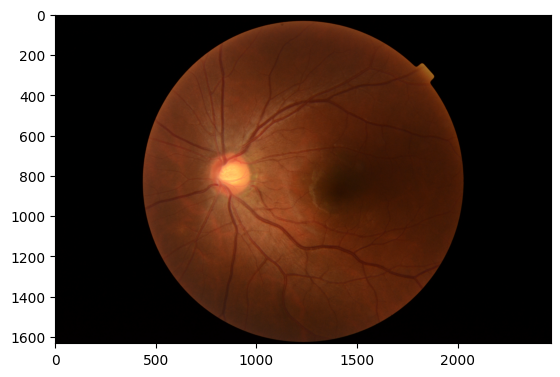

In [6]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
def img_show(img_path,title):
  #both parameters are strings. First one is for image path and second one is for image title.
  img= cv2.imread(img_path)[:,:,::-1]

  #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #you can use the above command alternatively. Matplotlib expects images in RGB format whereas OpenCV expects images in BGR format.
  print(title)
  print(img.shape)
  plt.imshow(img)



img_show('/content/repository/yiweichen04-retina_dataset-914b0f4/dataset/1_normal/NL_001.png','Normal eye')
#img_show('/content/repository/yiweichen04-retina_dataset-914b0f4/dataset/2_cataract/cataract_002.png','Cataract eye')

## Data Augmentation (for later use)

Data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation. Your model will perform better when new unseen data is encountered.

In [7]:
from tensorflow.keras import layers
import tensorflow as tf

image before augmenting
(1632, 2464, 3)


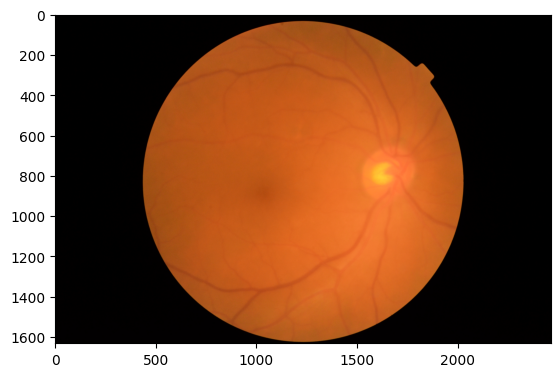

In [8]:
#we are going to create a data augmentation layer to be used later with the model.
data_augmentation= tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)

], name="data_augmentation")

#now we will test this layer.
path="/content/repository/yiweichen04-retina_dataset-914b0f4/dataset/2_cataract/cataract_075.png"
img_show(path,"image before augmenting")
img=cv2.imread(path)
augmented_img= data_augmentation(tf.expand_dims(img,axis=0))
augmented_img= tf.squeeze((augmented_img)/255.)[:, :, ::-1] #normalize after augmentation



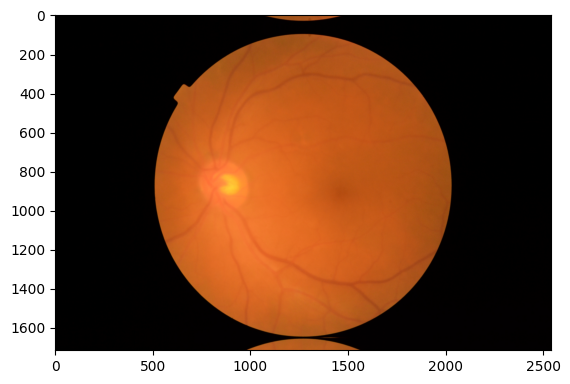

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(augmented_img)

In [10]:
augmented_img.shape

TensorShape([1715, 2540, 3])

## Split Data
We will split our data into training, validation and test data. The training set and validation set are to be used during model training.

Test set is new and unseen data used after training to assess model performance.

In [11]:
#import required models
import shutil

#Create destination train, validation and test folders.
original_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/dataset"
train_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/train"
validation_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/validation"
test_folder="/content/repository/yiweichen04-retina_dataset-914b0f4/test"

In [12]:
#make directories

os.mkdir(train_folder)
os.mkdir(validation_folder)
os.mkdir(test_folder)

In [13]:
#Now do this for normal and cataract folders.
train_normal_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/train/normal"
train_cataract_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/train/cataract"

validation_normal_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/validation/normal"
validation_cataract_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/validation/cataract"

test_normal_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/test/normal"
test_cataract_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/test/cataract"

os.mkdir(train_normal_folder)
os.mkdir(train_cataract_folder)
os.mkdir(validation_normal_folder)
os.mkdir(validation_cataract_folder)
os.mkdir(test_normal_folder)
os.mkdir(test_cataract_folder)


We will have 80-10-10 split

### Create functions for normal and cataract eye

In [14]:
#First, for normal eye
def create_normal(start,stop,folder_name):
  normal_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/dataset/1_normal"
  filenames=[f"NL_{i:03}.png" for i in range(start,stop+1)]

  for filename in filenames:
    src_path=os.path.join(normal_folder,filename)
    dst_path= os.path.join(folder_name,filename)

    shutil.copy(src_path,dst_path)

In [15]:
#Now, for cataract eye

def create_cataract(start,stop,folder_name):
  cataract_folder=r"/content/repository/yiweichen04-retina_dataset-914b0f4/dataset/2_cataract"
  filenames=[f"cataract_{i:03}.png" for i in range(start,stop+1)]

  for filename in filenames:
    src_path=os.path.join(cataract_folder,filename)
    dst_path=os.path.join(folder_name,filename)

    shutil.copy(src_path,dst_path)


Training set preparation with 240 images of normal class and 80 images of cataract class

In [16]:
create_normal(1,240,train_normal_folder)
create_cataract(1,80,train_cataract_folder)

Validation set preparation with 30 images of normal class and 10 images of cataract class

In [17]:
create_normal(241,270,validation_normal_folder)
create_cataract(81,90,validation_cataract_folder)

Test Set Preparation with 30 normal and 10 cataract images

In [18]:
create_normal(271,300,test_normal_folder)
create_cataract(91,100,test_cataract_folder)

# Data preprocessing
In the pre-processing step, resize the image to 224x224 and define a batch-size.

As we have binary-classification task, 'cataract' or 'normal', label is defined as 'binary'.

In [19]:
import tensorflow as tf

train_dir='/content/repository/yiweichen04-retina_dataset-914b0f4/train'
val_dir='/content/repository/yiweichen04-retina_dataset-914b0f4/validation'

img_size=(224,224)
train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                               label_mode='binary',
                                                               image_size=img_size,
                                                               batch_size=32)
val_data=tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                             batch_size=32,
                                                             label_mode='binary',
                                                             image_size=img_size)

Found 320 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [20]:
train_data.class_names

['cataract', 'normal']

# Model Building

Resnet50                
First, we will do feature extraction with keras functional API

In [21]:
#We are going to use EarlyStopping. Basically what it does is, it monitors validation accuracy.
#If validation accuracy does not improve for 3 epochs, the model fitting will cease.
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
base_model= tf.keras.applications.ResNet50(include_top=False)
#include top is false as we are going to create our own output layers for the model

base_model.trainable=False
#freezing the base layers

#input layer
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input layer')


#adding in data augmentation as a layer itself
x=data_augmentation(inputs)

#pass inputs to base model
x=base_model(x, training=False)
print(x.shape)

#We will use average pooling to reduce the size of the feature map.
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(x.shape)

outputs=tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer')(x)
model_0= tf.keras.Model(inputs,outputs)

#define early stopping callback.
early_stopping=EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)
checkpoint = ModelCheckpoint('best_resnet_model.h5', monitor='val_accuracy', save_best_only=True)

model_0.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Using 50 epochs instead of 5
history_model_0= model_0.fit(train_data,
                             epochs=50,
                             validation_data=val_data,
                             callbacks=[early_stopping,checkpoint])


94765736/94765736 [==============================] - 5s 0us/step
(None, None, None, 2048)
(None, 2048)
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 0.5097 - accuracy: 0.7656

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 50s 3s/step - loss: 0.5097 - accuracy: 0.7656 - val_loss: 0.4620 - val_accuracy: 0.7750
Epoch 2/50
10/10 [==============================] - 37s 2s/step - loss: 0.3936 - accuracy: 0.8406 - val_loss: 0.3744 - val_accuracy: 0.8250
Epoch 3/50
10/10 [==============================] - 35s 2s/step - loss: 0.3336 - accuracy: 0.8781 - val_loss: 0.3822 - val_accuracy: 0.8250
Epoch 4/50
10/10 [==============================] - 35s 2s/step - loss: 0.3056 - accuracy: 0.8719 - val_loss: 0.3400 - val_accuracy: 0.8750
Epoch 5/50
10/10 [==============================] - 32s 2s/step - loss: 0.2856 - accuracy: 0.8938 - val_loss: 0.3538 - val_accuracy: 0.8750
Epoch 6/50
10/10 [==============================] - 35s 2s/step - loss: 0.2724 - accuracy: 0.8781 - val_loss: 0.3355 - val_accuracy: 0.8500
Epoch 7/50
10/10 [==============================] - 33s 2s/step - loss: 0.2699 - accuracy: 0.8875 - val_loss: 0.3546 - val_accuracy: 0.8750


## saving the model for later use.

In [ ]:
model_0.save('model_1.h5')
from google.colab import files
files.download("model_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#check layers
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 1)                 2049  

#Prediction

In [ ]:
#using our model for prediction.

def process_img(pathname, title):
  img_show(pathname, title)
  image=cv2.imread(pathname)
  image_resized=cv2.resize(image,(224,224))

  import numpy as np
  image=np.expand_dims(image_resized,axis=0)
  print(image.shape)
  return image

cat
(1728, 2592, 3)
(1, 224, 224, 3)
1/1 [==============================] - 2s 2s/step
[[0.04493968]]


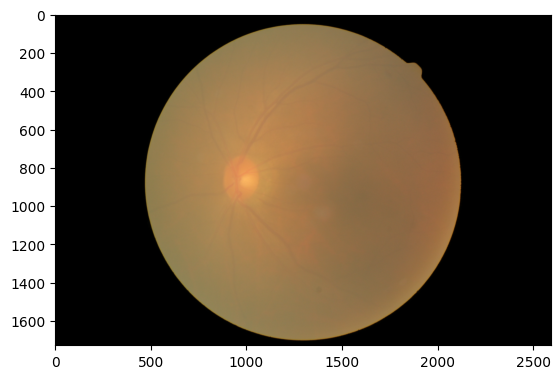

In [ ]:
image=process_img('/content/repository/yiweichen04-retina_dataset-914b0f4/test/cataract/cataract_099.png','cat')
pred=model_0.predict(image)
print(pred)
class_names=[]

In [ ]:
print(train_data.class_names)

['cataract', 'normal']


In [ ]:
if pred>0.5:
  class_index=1
else:
  class_index=0

print(train_data.class_names[class_index])

cataract


#Model Evaluation
Plot Loss Curves

In [23]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']


  epochs=range(len(loss))

  #plot loss
  plt.figure()
  plt.plot(epochs,loss,label='training loss')
  plt.plot(epochs,val_loss,label='val loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


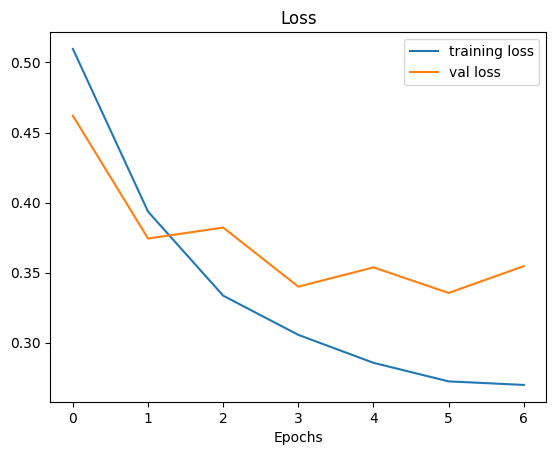

In [24]:
plot_loss_curves(history_model_0)

In [25]:
def plot_accuracy_curves(history):
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(accuracy))
  plt.figure()
  plt.plot(epochs,accuracy,label='training accuracy')
  plt.plot(epochs,val_accuracy,label='val accuracy')
  plt.xlabel('Epochs')
  plt.title('Accuracy')
  plt.legend()

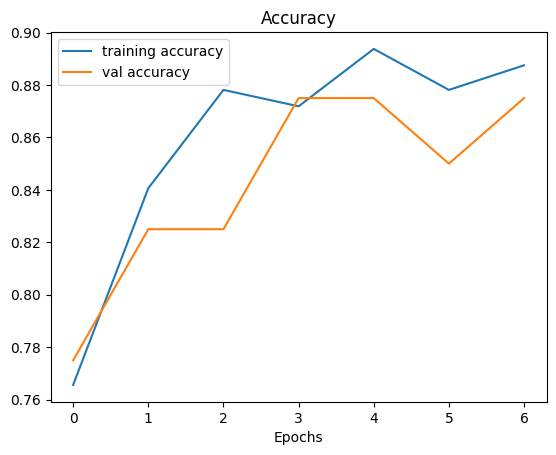

In [26]:
plot_accuracy_curves(history_model_0)